In [1]:
#importing libraries 
import pandas as pd
import numpy as np 


In [2]:
#load the dataset
ds = pd.read_csv('../data/benin-malanville.csv')
ds.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [3]:
#to show the number of rows and columns
ds.shape

(525600, 19)

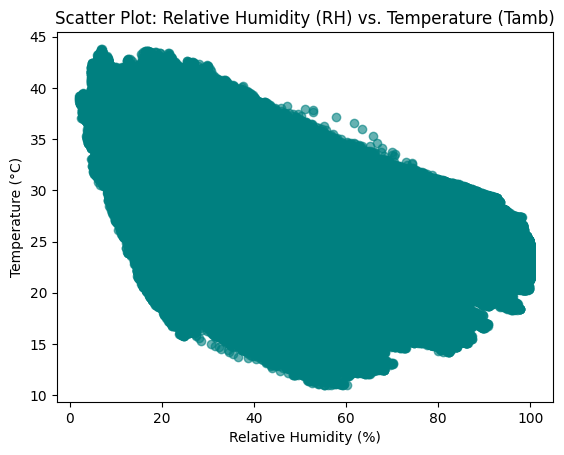

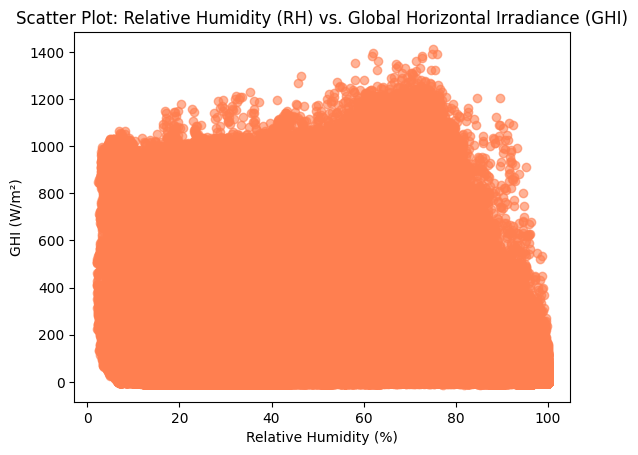

In [6]:
#Temperature Analysis examine How RH Influences temp and Solar Radiation
import matplotlib.pyplot as plt

# Scatter plot: RH vs. Tamb
plt.scatter(ds['RH'], ds['Tamb'], alpha=0.6, color='teal')
plt.title("Scatter Plot: Relative Humidity (RH) vs. Temperature (Tamb)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Temperature (°C)")
plt.show()

#relation b/n  RH vs. GHI
plt.scatter(ds['RH'], ds['GHI'], alpha=0.6, color='coral')
plt.title("Scatter Plot: Relative Humidity (RH) vs. Global Horizontal Irradiance (GHI)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("GHI (W/m²)")
plt.show()


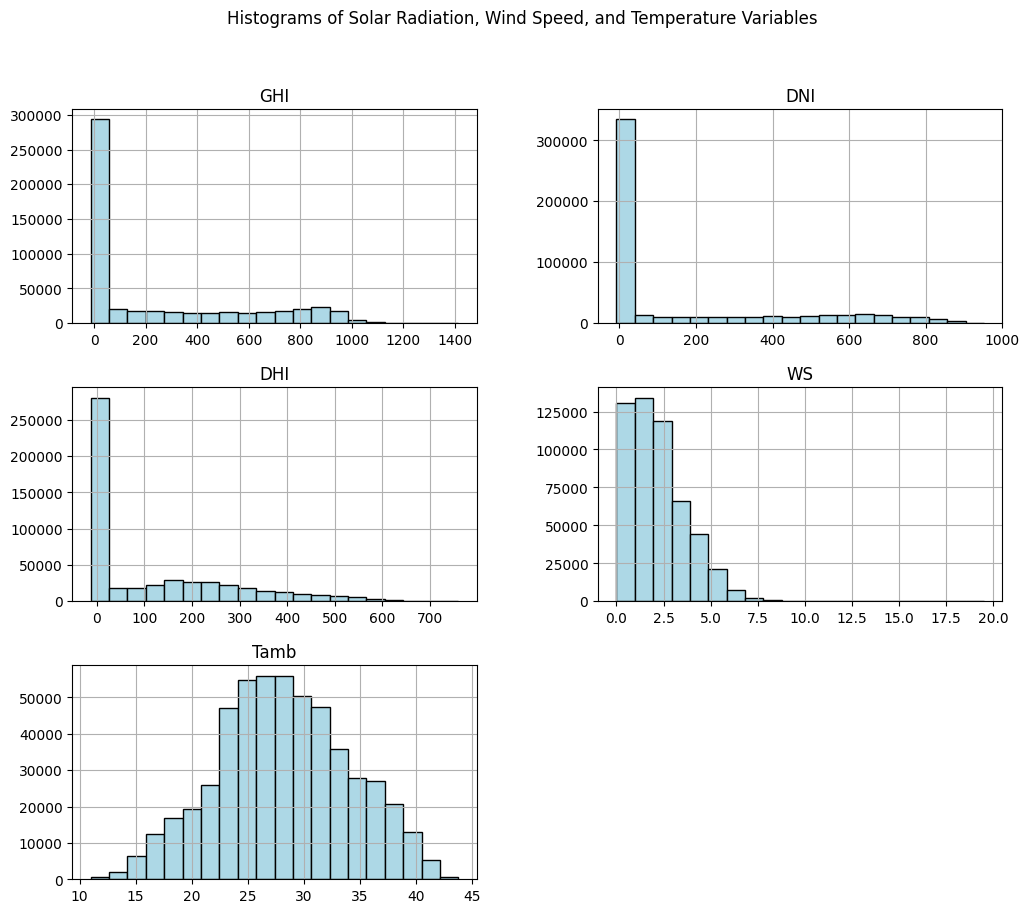

Number of Outliers Detected: 6898


In [7]:
#Visualize Frequency Distribution

# Plot histograms
from scipy.stats import zscore


variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
ds[variables].hist(bins=20, figsize=(12, 10), color='lightblue', edgecolor='black')
plt.suptitle("Histograms of Solar Radiation, Wind Speed, and Temperature Variables")
plt.show()


#Z-Score Analysis


# Compute Z-scores for numeric columns
z_scores = ds[['GHI', 'DNI', 'DHI', 'Tamb', 'WS']].apply(zscore)

# Flag rows with Z-scores > 3 or < -3
outliers = (z_scores > 3) | (z_scores < -3)
outlier_indices = ds[outliers.any(axis=1)].index

print(f"Number of Outliers Detected: {len(outlier_indices)}")

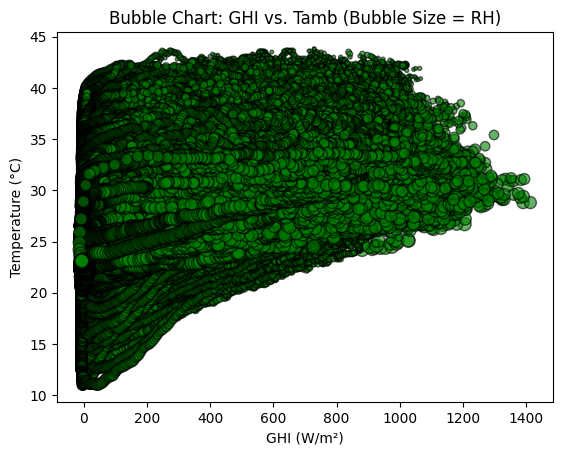

Missing Values Per Column:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Dataset size after outlier removal: (518702, 18)


In [9]:
#Bubble Charts

# Bubble chart: GHI vs. Tamb, bubble size = RH
plt.scatter(ds['GHI'], ds['Tamb'], s=ds['RH'], alpha=0.6, color='green', edgecolor='black')
plt.title("Bubble Chart: GHI vs. Tamb (Bubble Size = RH)")
plt.xlabel("GHI (W/m²)")
plt.ylabel("Temperature (°C)")
plt.show()


#Data Cleaning

# Count missing values
missing_values = ds.isnull().sum()
print("Missing Values Per Column:")
print(missing_values)


#Fill Missing Values:
#Numerical columns: Use mean/median.
#Comments column: Drop entirely if null throughout.

# Fill missing numerical values with median
ds.fillna(ds.median(numeric_only=True), inplace=True)


# Drop 'Comments' column if all null
if ds['Comments'].isnull().all():
    ds.drop(columns=['Comments'], inplace=True)


#Remove Outliers
# Remove rows with Z-scores > 3 or < -3
ds_cleaned = ds.drop(outlier_indices)
print(f"Dataset size after outlier removal: {ds_cleaned.shape}")